# Automating Crypto Website API

In [30]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import os
from time import time
from time import sleep
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'db0066fd-0047-4e22-9704-078f8702c8fb',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)
  

{'status': {'timestamp': '2024-04-05T21:30:21.445Z', 'error_code': 0, 'error_message': None, 'elapsed': 23, 'credit_count': 1, 'notice': None, 'total_count': 9509}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10957, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [3]:
df = pd.json_normalize(data['data'])
df['Time Stamp']= pd.to_datetime('now',utc=True)
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Time Stamp
0,1,Bitcoin,BTC,bitcoin,10957,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.967419e+07,1.967419e+07,...,52.6983,1.424270e+12,None,2024-04-05T21:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:27:13.463521+00:00
1,1027,Ethereum,ETH,ethereum,8726,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200682e+08,1.200682e+08,...,15.8434,4.011638e+11,None,2024-04-05T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:27:13.463521+00:00
2,825,Tether USDt,USDT,tether,81505,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.066015e+11,1.099426e+11,...,4.2117,1.099842e+11,None,2024-04-05T21:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-05 21:27:13.463521+00:00
3,1839,BNB,BNB,bnb,2132,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495352e+08,1.495352e+08,...,3.4444,8.721407e+10,None,2024-04-05T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:27:13.463521+00:00
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.449238e+08,5.733533e+08,...,3.1015,1.012015e+11,None,2024-04-05T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:27:13.463521+00:00
5,3408,USDC,USDC,usd-coin,17939,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.285397e+10,3.285397e+10,...,1.2973,3.285386e+10,None,2024-04-05T21:28:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-05 21:27:13.463521+00:00
6,52,XRP,XRP,xrp,1282,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.505155e+10,9.998772e+10,...,1.2844,5.907405e+10,None,2024-04-05T21:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:27:13.463521+00:00
7,74,Dogecoin,DOGE,dogecoin,944,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.437646e+11,1.437646e+11,...,1.0159,2.572428e+10,None,2024-04-05T21:29:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:27:13.463521+00:00
8,2010,Cardano,ADA,cardano,1124,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.559724e+10,3.677102e+10,...,0.8125,2.600653e+10,None,2024-04-05T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:27:13.463521+00:00
9,11419,Toncoin,TON,toncoin,247,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.470553e+09,5.104978e+09,...,0.7476,2.784369e+10,None,2024-04-05T21:28:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:27:13.463521+00:00


In [9]:
#Showing all rows and columns
pd.set_option('display.max.rows',None)
pd.set_option('display.max.columns',None)

### Automating the Data Pull

In [16]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': 'db0066fd-0047-4e22-9704-078f8702c8fb',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        
    # For only dataframe
    #df2 = pd.json_normalize(data['data'])
    #df2['Time Stamp']= pd.to_datetime('now',utc=True)
    #df_append = pd.DataFrame(df2)
    #df = pd.concat([df, df_append])

    # For csv + dataframe
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now',utc=True)
    df
    if not os.path.isfile(r'C:\Projects\API.csv'):
        df.to_csv(r'C:\Projects\API.csv',header='column_names')
    else:
        df.to_csv(r'C:\Projects\API.csv',mode='a',header=False)

In [ ]:
for i in range(333):
    api_runner()
    print("API runner completed succesfully")
    sleep(60)
exit()

In [51]:
df_csv = pd.read_csv(r'C:\Projects\API.csv')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10957,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19674187.00000,19674187.00000,False,NaN,1,NaN,NaN,None,2024-04-05T21:58:00.000Z,67590.43183,34610398750.04942,1.11860,-0.15778,-0.24211,-2.67737,1.54430,59.58434,53.89402,1329786795178.78760,52.66090,1419399068370.87988,None,2024-04-05T21:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:55:31.896834+00:00
1,1027,Ethereum,ETH,ethereum,8726,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120068151.52197,120068151.52197,True,NaN,2,NaN,NaN,None,2024-04-05T21:57:00.000Z,3324.31596,15643689190.88137,8.90320,-0.36340,0.13449,-4.66148,-13.71812,45.32169,48.34753,399144472737.66980,15.80650,399144472737.66998,None,2024-04-05T21:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:55:31.896834+00:00
2,825,Tether USDt,USDT,tether,81506,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,106601457935.07361,109942615136.74486,True,NaN,3,NaN,NaN,None,2024-04-05T21:57:00.000Z,1.00042,65846956169.51769,-4.30390,0.00908,0.02517,0.00490,-0.03402,0.14633,-0.02122,106646686023.22792,4.22330,109989260786.67999,None,2024-04-05T21:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-05 21:55:31.896834+00:00
3,1839,BNB,BNB,bnb,2132,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149535248.55305,149535248.55305,False,NaN,4,NaN,NaN,None,2024-04-05T21:57:00.000Z,581.61711,2057959383.78941,-10.82460,0.03084,-0.79245,-5.27211,35.94282,93.57040,89.47559,86972258751.96155,3.44420,86972258751.96001,None,2024-04-05T21:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:55:31.896834+00:00
4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,444923776.83344,573353291.57435,True,NaN,5,NaN,NaN,None,2024-04-05T21:57:00.000Z,175.55809,7043476446.71369,81.38290,-0.24448,-3.66925,-7.12331,33.13254,85.05696,85.90655,78109968296.02032,3.09320,100656808557.25000,None,2024-04-05T21:57:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:55:31.896834+00:00
5,3408,USDC,USDC,usd-coin,17939,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32853967735.82737,32853967735.82737,False,NaN,6,NaN,NaN,None,2024-04-05T21:57:00.000Z,1.00007,13428789066.89152,16.18150,0.01444,0.03733,0.01558,0.01014,-0.01345,0.00357,32856322274.08972,1.30140,32856322274.09000,None,2024-04-05T21:57:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-05 21:55:31.896834+00:00
6,52,XRP,XRP,xrp,1282,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,7,NaN,NaN,None,2024-04-05T21:58:00.000Z,0.58873,1544317202.51868,-29.92030,-0.39324,-0.22818,-5.79966,-4.42744,16.21826,3.67702,32410547601.37098,1.28350,58873088791.89000,None,2024-04-05T21:58:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:55:31.896834+00:00
7,74,Dogecoin,DOGE,dogecoin,944,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,143764566383.70523,143764566383.70523,True,NaN,8,NaN,NaN,None,2024-04-05T21:58:00.000Z,0.17755,1957651909.35978,-10.94040,-0.82981,0.02176,-15.53541,11.80042,127.77137,119.34273,25525205559.14775,1.01080,2552520

### Transforming the Data

In [19]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [21]:
df_csv

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10957,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19674187.00000,19674187.00000,False,NaN,1,NaN,NaN,NaN,2024-04-05T21:49:00.000Z,67782.64708,34671833805.90302,1.38980,0.18825,0.03968,-2.45870,1.86680,60.00110,54.34625,1333568474026.21851,52.72440,1423435588700.59009,NaN,2024-04-05T21:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:46:51.415681
1,1,1027,Ethereum,ETH,ethereum,8726,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120068151.52197,120068151.52197,True,NaN,2,NaN,NaN,NaN,2024-04-05T21:48:00.000Z,3334.14054,15677863084.05035,9.12320,-0.07024,0.66996,-4.30052,-13.31767,45.65050,48.64539,400324091525.49597,15.82730,400324091525.50000,NaN,2024-04-05T21:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:46:51.415681
2,2,825,Tether USDt,USDT,tether,81506,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,106601457935.07359,109942615136.74486,True,NaN,3,NaN,NaN,NaN,2024-04-05T21:48:00.000Z,1.00035,65927582106.54477,-4.20060,0.00368,0.00864,-0.00955,-0.00610,0.06930,-0.02949,106638283169.02087,4.21610,109980594565.92999,NaN,2024-04-05T21:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-05 21:46:51.415681
3,3,1839,BNB,BNB,bnb,2132,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,149535248.55305,149535248.55305,False,NaN,4,NaN,NaN,NaN,2024-04-05T21:48:00.000Z,581.52681,2062966378.58307,-10.56780,-0.04669,-0.80874,-5.09209,35.99657,93.42104,89.00077,86958756050.52052,3.43800,86958756050.52000,NaN,2024-04-05T21:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:46:51.415681
4,4,5426,Solana,SOL,solana,649,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,444923776.83344,573353291.57435,True,NaN,5,NaN,NaN,NaN,2024-04-05T21:48:00.000Z,175.98873,7009332984.81304,80.48730,-0.04345,-3.25005,-6.99860,33.34818,84.64410,86.26802,78301571409.98232,3.09580,100903718886.13000,NaN,2024-04-05T21:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:46:51.415681
5,5,3408,USDC,USDC,usd-coin,17939,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,32853967735.82737,32853967735.82737,False,NaN,6,NaN,NaN,NaN,2024-04-05T21:48:00.000Z,0.99986,13379359153.28572,15.57050,-0.01082,-0.01157,-0.00054,0.03741,-0.09380,-0.01688,32849492134.01041,1.29910,32849492134.01000,NaN,2024-04-05T21:48:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-05 21:46:51.415681
6,6,52,XRP,XRP,xrp,1282,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,55051549471.00000,99987715632.00000,False,NaN,7,NaN,NaN,NaN,2024-04-05T21:49:00.000Z,0.58916,1544823213.19745,-29.81110,-0.33512,0.15783,-5.78625,-4.25467,16.05577,3.74267,32434103247.65470,1.28230,58915877135.74000,NaN,2024-04-05T21:49:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-05 21:46:51.415681
7,7,74,Dogecoin,DOGE,dogecoin,944,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,143764566383.70523,143764566383.70523,True,NaN,8,NaN,NaN,NaN,2024-04-05T21:49:00.000Z,0.17800,1960596645.25479,-10.97970,-0.61675,0.40175,-15.27740,12.54018,128.30346,119.72181,25590263352.24973,1.01170,25590263352.25000,NaN,2024-04-05T2

In [22]:
df3 = df_csv.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.01524,-0.10122,-2.56803,1.70555,59.79272,54.12014
Ethereum,-0.21682,0.40223,-4.48100,-13.51790,45.48610,48.49646
Tether USDt,0.00638,0.01691,-0.00232,-0.02006,0.10781,-0.02536
BNB,-0.00792,-0.80060,-5.18210,35.96969,93.49572,89.23818
Solana,-0.14396,-3.45965,-7.06096,33.24036,84.85053,86.08728
USDC,0.00181,0.01288,0.00752,0.02378,-0.05363,-0.00666
XRP,-0.36418,-0.03518,-5.79295,-4.34105,16.13702,3.70985
Dogecoin,-0.72328,0.21175,-15.40640,12.17030,128.03742,119.53227
Cardano,-0.06500,-0.17022,-10.96324,-21.24510,17.47969,10.05102


In [23]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h      0.01524
              quote.USD.percent_change_24h    -0.10122
              quote.USD.percent_change_7d     -2.56803
              quote.USD.percent_change_30d     1.70555
              quote.USD.percent_change_60d    59.79272
              quote.USD.percent_change_90d    54.12014
Ethereum      quote.USD.percent_change_1h     -0.21682
              quote.USD.percent_change_24h     0.40223
              quote.USD.percent_change_7d     -4.48100
              quote.USD.percent_change_30d   -13.51790
              quote.USD.percent_change_60d    45.48610
              quote.USD.percent_change_90d    48.49646
Tether USDt   quote.USD.percent_change_1h      0.00638
              quote.USD.percent_change_24h     0.01691
              quote.USD.percent_change_7d     -0.00232
              quote.USD.percent_change_30d    -0.02006
              quote.USD.percent_change_60d     0.10781
              quote.US

In [24]:
#To change the type of df4 from series back to data frame
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h    0.01524
             quote.USD.percent_change_24h  -0.10122
             quote.USD.percent_change_7d   -2.56803
             quote.USD.percent_change_30d   1.70555
             quote.USD.percent_change_60d  59.79272
             quote.USD.percent_change_90d  54.12014
Ethereum     quote.USD.percent_change_1h   -0.21682
             quote.USD.percent_change_24h   0.40223
             quote.USD.percent_change_7d   -4.48100
             quote.USD.percent_change_30d -13.51790
             quote.USD.percent_change_60d  45.48610
             quote.USD.percent_change_90d  48.49646
Tether USDt  quote.USD.percent_change_1h    0.00638
             quote.USD.percent_change_24h   0.01691
             quote.USD.percent_change_7d   -0.00232
             quote.USD.percent_change_30d  -0.02006
             quote.USD.percent_change_60d   0.10781
             quote.USD.percent_change_90d  -0.02536
BNB          quote.USD.percent_change_1h   -0.00792
             quote.USD.percent_change_24h  -0.80060
             quote.USD.percent_change_7d   -5.18210
             quote.USD.percent_change_30d  35.96969
             quote.USD.percent_change_60d  93.49572
             quote.USD.percent_change_90d  89.23818
Solana       quote.USD.percent_change_1h   -0.14396
             quote.USD.percent_change_24h  -3.45965
             quote.USD.percent_change_7d   -7.06096
             quote.USD.percent_change_30d  33.24036
             quote.USD.percent_change_60d  84.85053
             quote.USD.percent_change_90d  86.08728
USDC         quote.USD.percent_change_1h    0.00181
             quote.USD.percent_change_24h   0.01288
             quote.USD.percent_change_7d    0.00752
             quote.USD.percent_change_30d   0.02378
             quote.USD.percent_change_60d  -0.05363
             quote.USD.percent_change_90d  -0.00666
XRP          quote.USD.percent_change_1h   -0.36418
             quote.USD.percent_change_24h  -0.03518
             quote.USD.percent_change_7d   -5.79295
             quote.USD.percent_change_30d  -4.34105
             quote.USD.percent_change_60d  16.13702
             quote.USD.percent_change_90d   3.70985
Dogecoin     quote.USD.percent_change_1h   -0.72328
             quote.USD.percent_change_24h   0.21175
             quote.USD.percent_change_7d  -15.40640
             quote.USD.percent_change_30d  12.17030
             quote.USD.percent_change_60d 128.03742
             quote.USD.percent_change_90d 119.53227
Cardano      quote.USD.percent_change_1h   -0.06500
             quote.USD.percent_change_24h  -0.17022
             quote.USD.percent_change_7d  -10.96324
             quote.USD.percent_change_30d -21.24510
             quote.USD.percent_change_60d  17.47969
             quote.USD.percent_change_90d  10.05102
Toncoin      quote.USD.percent_change_1h   -1.13939
             quote.USD.percent_change_24h   7.77794
             quote.USD.percent_change_7d    5.77441
             quote.USD.percent_change_30d 100.23144
             quote.USD.percent_change_60d 163.77257
             quote.USD.percent_change_90d 149.38995
Avalanche    quote.USD.percent_change_1h   -0.33549
             quote.USD.percent_change_24h  -1.86632
             quote.USD.percent_change_7d  -14.10581
             quote.USD.percent_change_30d   7.75549
             quote.USD.percent_change_60d  32.12890
             quote.USD.percent_change_90d  31.07564
Shiba Inu    quote.USD.percent_change_1h   -0.40286
             quote.USD.percent_change_24h  -1.46778
             quote.USD.percent_change_7d  -12.05603
             quote.USD.percent_change_30d -21.33583
             quote.USD.percent_change_60d 203.04197
             quote.USD.percent_change_90d 179.29980
Bitcoin Cash quote.USD.percent_change_1h    0.40687
             quote.USD.percent_change_24h   4.89508
             quote.USD.percent_change_7d    9.38895
             quote.USD.percent_change_30d

In [27]:
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.01524
1,Bitcoin,quote.USD.percent_change_24h,-0.10122
2,Bitcoin,quote.USD.percent_change_7d,-2.56803
3,Bitcoin,quote.USD.percent_change_30d,1.70555
4,Bitcoin,quote.USD.percent_change_60d,59.79272
5,Bitcoin,quote.USD.percent_change_90d,54.12014
6,Ethereum,quote.USD.percent_change_1h,-0.21682
7,Ethereum,quote.USD.percent_change_24h,0.40223
8,Ethereum,quote.USD.percent_change_7d,-4.48100
9,Ethereum,quote.USD.percent_change_30d,-13.51790


In [29]:
#Rename column named level_1
df7 = df6.rename(columns={'level_1': 'Percent Change'})
df7

,name,Percent Change,values
0,Bitcoin,quote.USD.percent_change_1h,0.01524
1,Bitcoin,quote.USD.percent_change_24h,-0.10122
2,Bitcoin,quote.USD.percent_change_7d,-2.56803
3,Bitcoin,quote.USD.percent_change_30d,1.70555
4,Bitcoin,quote.USD.percent_change_60d,59.79272
5,Bitcoin,quote.USD.percent_change_90d,54.12014
6,Ethereum,quote.USD.percent_change_1h,-0.21682
7,Ethereum,quote.USD.percent_change_24h,0.40223
8,Ethereum,quote.USD.percent_change_7d,-4.48100
9,Ethereum,quote.USD.percent_change_30d,-13.51790


In [32]:
#Renaming values
df7['Percent Change'] = df7['Percent Change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,Percent Change,values
0,Bitcoin,1h,0.01524
1,Bitcoin,24h,-0.10122
2,Bitcoin,7d,-2.56803
3,Bitcoin,30d,1.70555
4,Bitcoin,60d,59.79272
5,Bitcoin,90d,54.12014
6,Ethereum,1h,-0.21682
7,Ethereum,24h,0.40223
8,Ethereum,7d,-4.48100
9,Ethereum,30d,-13.51790


## Visualization

#### Price increase of each cryptocurrency

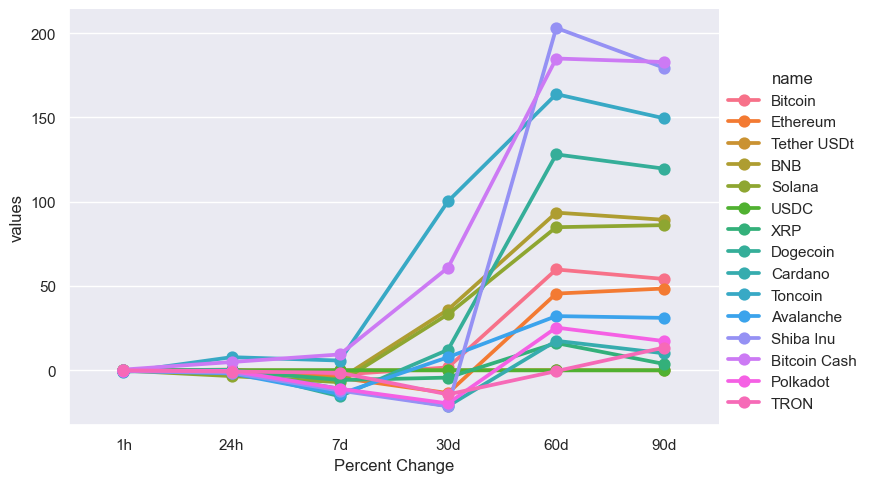

In [50]:
sns.catplot(x='Percent Change', y='values', hue='name', data=df7, kind='point',height=5, aspect=1.5)

#### Bitcoin price change compared to last execution of program

In [48]:
df8 = df_csv[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,67782.64708,2024-04-05 21:46:51.415681
15,Bitcoin,67590.43183,2024-04-05 21:55:31.896834+00:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

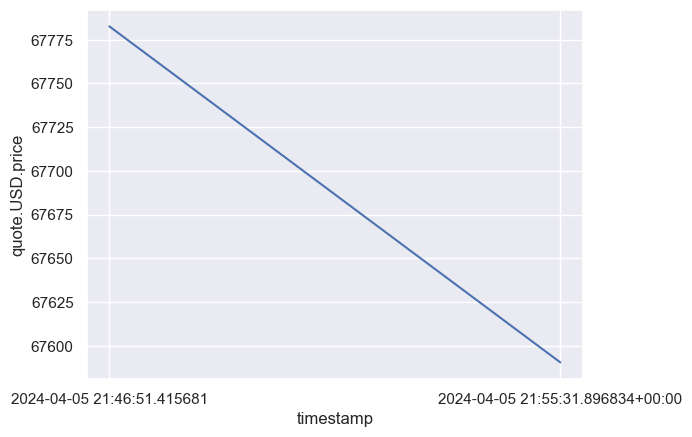

In [49]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data = df8)